# Data Preprocessing
Data preprocessing is a crucial step in the data analysis and machine learning pipeline. It involves preparing and cleaning data before it can be fed into a machine learning model. The goal is to ensure that the data is in a suitable format for analysis, which can improve the model's accuracy and performance.

## Steps in Data Preprocessing

1. **Data Collection**: Gather raw data from various sources, such as databases, APIs, web scraping, etc.

2. **Data Cleaning**: This step involves handling missing values, outliers, and duplicate records.
   - **Missing Values**: They can be filled (imputation), removed, or flagged.
   - **Outliers**: These can be identified using statistical methods (like z-scores) and can be removed or transformed.
   - **Duplicates**: Duplicate records should be removed to avoid bias in analysis.

3. **Data Transformation**: Convert the data into a suitable format or structure.
   - **Normalization/Standardization**: Rescale features to a similar range, especially for algorithms sensitive to feature scales (like K-means or SVM).
   - **Encoding Categorical Variables**: Convert categorical data into numerical format, as most algorithms work with numbers. Common techniques include:
     - **Label Encoding**: Assigns a unique integer to each category.
     - **One-Hot Encoding**: Creates binary columns for each category.

4. **Feature Engineering**: Create new features from existing ones to provide more information to the model. This can include polynomial features, interaction terms, or aggregating features.

5. **Splitting Data**: Divide the dataset into training and testing sets to evaluate the model's performance.

# Outlier
In machine learning, an **outlier** refers to a data point that is significantly different from the majority of the data. Outliers can arise due to variability in the data, errors in data collection, or other irregularities, and they may represent noise or indicate unusual, but important, information about the data.

## Characteristics of Outliers:
1. **Extreme Values**: Outliers are typically values that are far away from the mean or median of a dataset.
2. **Isolated Data Points**: Outliers often do not conform to the trend of the other data points.
3. **Influence on Models**: They can skew results, affect the accuracy of machine learning models, and lead to misleading conclusions.

## Causes of Outliers:
1. **Measurement Errors**: For example, if a sensor records an incorrect temperature reading due to a malfunction.
2. **Data Entry Errors**: Typing mistakes or errors in recording values can produce outliers.
3. **Natural Variability**: Sometimes, outliers occur naturally, such as extremely tall people in a dataset of human heights.

## Types of Outliers:
1. **Univariate Outliers**: These occur in one-dimensional data. For example, a very high value in a list of ages of students.
2. **Multivariate Outliers**: These occur in multi-dimensional data. For example, a person with an average height but an extremely low weight.

## Detecting Outliers
Detecting outliers is an essential part of data preprocessing because outliers can distort statistical analyses and model performance.

### 1. Z-Score (Standard Score) Method
The Z-Score measures how many standard deviations a data point is from the mean. Typically, data points with a Z-Score greater than 3 (or less than -3) are considered outliers.

Formula for Z-Score:

$$
𝑍 = \frac{𝑋 - 𝜇}{𝜎}
$$

Where:

- X is the data point,
- μ is the mean,
- σ is the standard deviation.

In [3]:
# Z-Score Implementation
import pandas as pd
data = {
    'Age': [22, 23, 24, 25, 26, 27, 28, 29, 30, 100]  # 100 is an outlier
}

df = pd.DataFrame(data)
df['Z_Score'] = (df['Age'] - df['Age'].mean()) / df['Age'].std()

# Define a threshold for outliers
threshold = 0.5

# Flag values that are outliers
df['Outlier'] = df['Z_Score'].apply(lambda x: 'Outlier' if abs(x) > threshold else 'Normal')

print(df)

   Age   Z_Score  Outlier
0   22 -0.484223   Normal
1   23 -0.441747   Normal
2   24 -0.399272   Normal
3   25 -0.356796   Normal
4   26 -0.314320   Normal
5   27 -0.271845   Normal
6   28 -0.229369   Normal
7   29 -0.186893   Normal
8   30 -0.144417   Normal
9  100  2.828882  Outlier


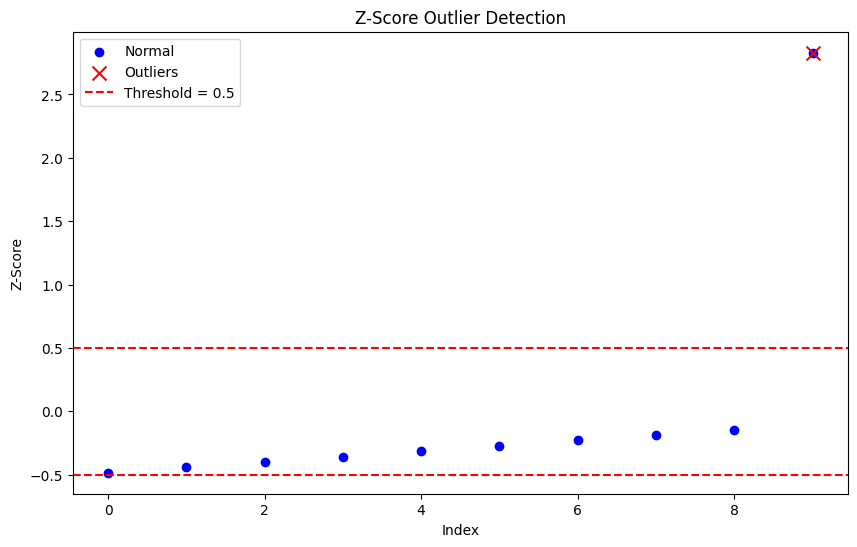

In [10]:
# Z-Score Visualization
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['Z_Score'], color='blue', label='Normal')
plt.scatter(df[df['Outlier'] == 'Outlier'].index, df[df['Outlier'] == 'Outlier']['Z_Score'], 
            color='red', label='Outliers', marker='x', s=100)
plt.axhline(y=threshold, color='r', linestyle='--', label=f"Threshold = {threshold}")
plt.axhline(y=-threshold, color='r', linestyle='--')
plt.title('Z-Score Outlier Detection')
plt.xlabel('Index')
plt.ylabel('Z-Score')
plt.legend()
plt.show()

### 2. IQR (Interquartile Range) Method
The IQR method uses percentiles to detect outliers. It measures the spread of the middle 50% of the data.
### 3. Boxplot
Boxplots are a graphical representation of data that use the IQR to detect outliers. In a boxplot, any data points that fall outside 1.5 times the IQR from the quartiles are marked as outliers.

# Similarity Measures
Similarity measurement is a crucial concept used to quantify how alike two or more data points or sets of data are. It plays a significant role in fields like clustering, recommendation systems, image recognition, natural language processing, and more.

## Cosine similarity
Cosine similarity is a metric used to measure the similarity between two non-zero vectors in an inner product space. It is often used in information retrieval and text analysis to measure the similarity between two documents, but it can be applied to any vectors, such as feature vectors in machine learning.

__Formula:__
$$
\text{Cosine Similarity} = \cos(\theta) = \frac{\mathbf{A} \cdot \mathbf{B}}{\|\mathbf{A}\| \|\mathbf{B}\|}
$$

Where:

- \$\mathbf{A}\$ and \$\mathbf{B}\$ are the two vectors.
- \$\mathbf{A} \cdot \mathbf{B}\$ is the dot product of vectors \$\mathbf{A}\$ and \$\mathbf{B}\$.
- \$\|\mathbf{A}\|\$ is the magnitude (length) of vector \$\mathbf{A}\$.
- \$\|\mathbf{B}\|\$ is the magnitude (length) of vector \$\mathbf{B}\$.

### Interpretation
- If θ = 0°, the ‘x’ and ‘y’ vectors overlap, thus proving they are similar.
- If θ = 90°, the ‘x’ and ‘y’ vectors are dissimilar
- If the value is close to 1, it indicates that the two vectors are very similar (the angle between them is small).
- If the cosine similarity were closer to 0, it would indicate that the vectors are more orthogonal (less similar).

In [22]:
# Implementation
import numpy as np

def cosine_similarity(A, B):
    A = np.array(A)
    B = np.array(B)
    
    dot_product = np.dot(A, B)
    
    magnitude_A = np.linalg.norm(A)
    magnitude_B = np.linalg.norm(B)
    
    if magnitude_A == 0 or magnitude_B == 0:
        return 0.0
    
    cosine_sim = dot_product / (magnitude_A * magnitude_B)    
    return cosine_sim

A = [1, 2, 3]
B = [4, 5, 6]
cosine_similarity(A, B)

0.9746318461970762

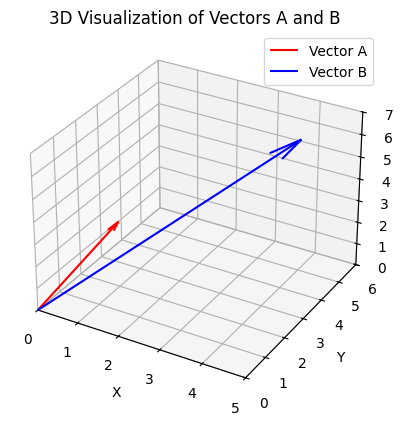

In [24]:
# Visualization
from mpl_toolkits.mplot3d import Axes3D

def visualize_vectors(A, B):
    # Create a 3D plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # Define origin point for the vectors
    origin = [0, 0, 0]
    
    # Plot vector A
    ax.quiver(*origin, A[0], A[1], A[2], color='r', label='Vector A', arrow_length_ratio=0.1)
    
    # Plot vector B
    ax.quiver(*origin, B[0], B[1], B[2], color='b', label='Vector B', arrow_length_ratio=0.1)
    
    # Set the limits of the plot
    ax.set_xlim([0, max(A[0], B[0]) + 1])
    ax.set_ylim([0, max(A[1], B[1]) + 1])
    ax.set_zlim([0, max(A[2], B[2]) + 1])
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('3D Visualization of Vectors A and B')
    ax.legend()
    plt.show()

visualize_vectors(A, B)

# Scaling
## Normalization
Normalization is a process of adjusting the values measured on different scales to a common scale, without distorting differences in the ranges of values.
### Min-Max Normalization
It scales the data between a fixed range, usually between 0 and 1.

It's useful when you want to preserve the relationships between values and when the data doesn’t have outliers, as they can skew the range.

__Formula:__
$$
X' = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}
$$

Where:

- \$ X' \$ = normalized value,
- \$ X \$ = original value,
- \$ X_{\text{min}} \$ = minimum value of the feature,
- \$ X_{\text{max}} \$ = maximum value of the feature.


In [5]:
# Ungrouped data
data = [5, 10, 15, 20, 25]
min_val = min(data)
max_val = max(data)
normalized_data = [(x - min_val) / (max_val - min_val) for x in data]
print(normalized_data)

[0.0, 0.25, 0.5, 0.75, 1.0]


In [9]:
# Grouped Data
class_intervals = [(0, 10), (10, 20), (20, 30), (30, 40), (40, 50)]
frequencies = [4, 6, 8, 5, 7]

# Extracting the minimum and maximum values across all class intervals
global_min = min([interval[0] for interval in class_intervals])
global_max = max([interval[1] for interval in class_intervals])

# Applying min-max normalization to the class intervals
normalized_intervals = [
    (
        (interval[0] - global_min) / (global_max - global_min), 
        (interval[1] - global_min) / (global_max - global_min)
    ) 
    for interval in class_intervals
]
print(normalized_intervals)

[(0.0, 0.2), (0.2, 0.4), (0.4, 0.6), (0.6, 0.8), (0.8, 1.0)]


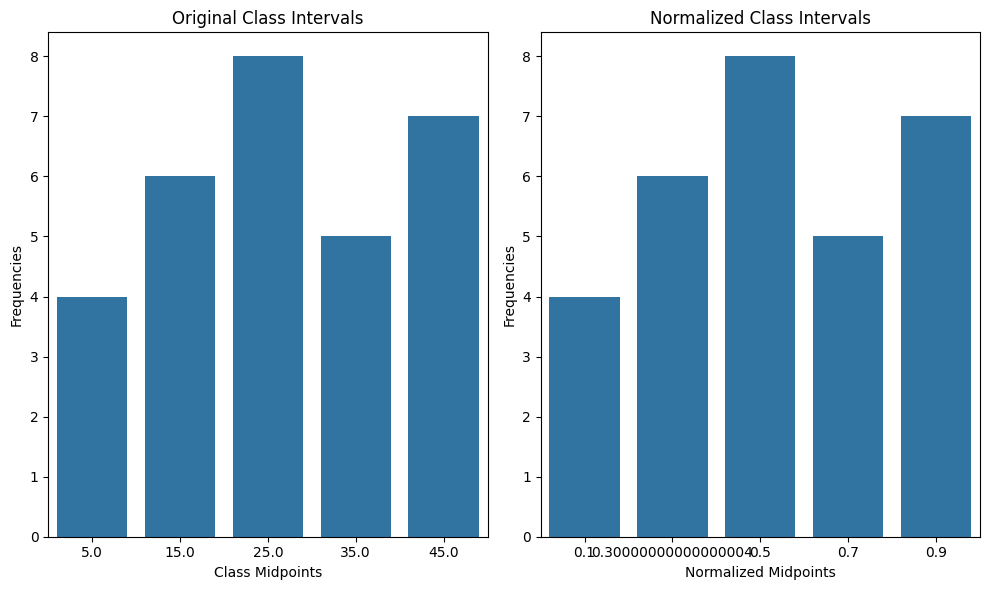

In [13]:
# Visualization for grouped data
import matplotlib.pyplot as plt
import seaborn as sns

original_midpoints = [(interval[0] + interval[1]) / 2 for interval in class_intervals]
normalized_midpoints = [(interval[0] + interval[1]) / 2 for interval in normalized_intervals]

fig, ax = plt.subplots(1, 2, figsize=(10, 6))

# Plot for original intervals
sns.barplot(x=original_midpoints, y=frequencies, ax=ax[0])
ax[0].set_title('Original Class Intervals')
ax[0].set_xlabel('Class Midpoints')
ax[0].set_ylabel('Frequencies')

# Plot for normalized intervals
sns.barplot(x=normalized_midpoints, y=frequencies, ax=ax[1])
ax[1].set_title('Normalized Class Intervals')
ax[1].set_xlabel('Normalized Midpoints')
ax[1].set_ylabel('Frequencies')

plt.tight_layout()
plt.show()

### Z-score normalization
Z-score normalization transforms data to have a mean of 0 and a standard deviation of 1.

It's just as same as z-score method in outlier detection, just here don't need to use any threshold.

Both Z-score implementation are same, it scale data in a range, but if there have any outlier, it will be still out of range, an extra threshold is used during outlier detection

### Decimal Scaling normalization
Decimal scaling normalization is used to transform the data into a smaller range by moving the decimal point of the values. This method is particularly useful when you want to ensure that all values fall within a specific range, typically between -1 and 1 or 0 and 1.

__Formula:__
The formula for decimal scaling normalization is:

$$
X' = \frac{X}{10^j}
$$

Where:

- \$ X' \$ = normalized value,
- \$ X \$ = original value,
- \$ j \$ = the smallest integer such that \$ \text{max}(|X'|) < 1 \$.

In [ ]:
# Ungrouped data
# Step 1: Determine the maximum absolute value
max_value = np.max(data)

# Step 2: Find j
j = 0
while max_value / (10 ** j) >= 1:
    j += 1

# Step 3: Apply decimal scaling normalization
normalized_data = data / (10 ** j)

# Display results
print("Original Data:", data)
print("Maximum Value:", max_value)
print("Value of j:", j)

In [20]:
# Grouped data
# Step 1: Calculate midpoints
midpoints = [(start + end) / 2 for start, end in class_intervals]

# Step 2: Determine the maximum absolute value
max_value = max(midpoints)

# Step 3: Find j
j = 0
while max_value / (10 ** j) >= 1:
    j += 1

# Step 4: Apply decimal scaling normalization
normalized_midpoints = [x / (10 ** j) for x in midpoints]

print("Class Intervals:", class_intervals)
print("Midpoints:", midpoints)
print("Normalized Midpoints:", normalized_midpoints)
print("Maximum Value:", max_value)
print("Value of j:", j)
print("Frequencies:", frequencies)

Class Intervals: [(0, 10), (10, 20), (20, 30), (30, 40), (40, 50)]
Midpoints: [5.0, 15.0, 25.0, 35.0, 45.0]
Normalized Midpoints: [0.05, 0.15, 0.25, 0.35, 0.45]
Maximum Value: 45.0
Value of j: 2
Frequencies: [4, 6, 8, 5, 7]
